# Alignment

In [580]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Image
import ufit
import numpy as np
from ufit.lab import *
from lmfit.models import LinearModel, GaussianModel, LorentzianModel, PseudoVoigtModel, Model
set_datatemplate('C:/Users/num/Documents/cycle506/exp943/Datafiles/HB1_exp0943_scan%04d.dat')
ufit.set_dataformat('simple')

def gauss_fit(x,y,\
        center1,center1_vary,center1_min, center1_max,\
        fwhm1,fwhm1_vary, fwhm1_min, fwhm1_max,\
        amplitude1,amplitude1_vary, amplitude1_min, amplitude1_max,\
        results):
    erry =np.sqrt(y)


    pgvt1 = GaussianModel(prefix='g1_')
    pars = pgvt1.guess(y, x=x)
    pars['g1_center'].set(value=center1,
                           vary=center1_vary,
                           min=center1_min,
                           max=center1_max)
    pars['g1_sigma'].set(value=fwhm1 / 2.,
                          vary=fwhm1_vary,
                          min=fwhm1_min,
                          max=fwhm1_max)
    pars['g1_amplitude'].set(value=amplitude1,
                              vary=amplitude1_vary,
                              min=amplitude1_min,
                              max=amplitude1_max)

    mod1 =pgvt1
    init = mod1.eval(pars, x=x)
    out = mod1.fit(y, pars, x=x)
    print_fit_report = results
    if print_fit_report == 1:
        print((out.fit_report()))
    if print_fit_report == 0:
        #print('#--------peak1---------#')
        print(('g1_center:', out.params['g1_center'].value))
        print(('g1_fwhm:', out.params['g1_fwhm'].value))
        print(('g1_amplitude:', out.params['g1_amplitude'].value))
        print('chisqr, redchisqr', out.chisqr, out.redchi)
    if print_fit_report == -1:
        pass

    #--------------------------------------
    #plt.figure()
    plt.errorbar(x, y, erry, xerr=None, fmt='', marker='o', ms= 3, mfc='none', mec=None,\
                 ecolor=None, elinewidth=0.5, capsize=0,capthick=0,lw=0,\
                 label='cen:'+str('%10.3f'%out.params['g1_center'].value)+'\nfwhm :'+str('%10.3f'%out.params['g1_fwhm'].value))
    plt.plot(x, out.best_fit, '--r', linewidth=0.5)



def lgauss_fit(x,y,\
        slope,slope_vary,slope_min,slope_max,\
        intercept,intercept_vary, intercept_min, intercept_max,\
        center1,center1_vary,center1_min, center1_max,\
        fwhm1,fwhm1_vary, fwhm1_min, fwhm1_max,\
        amplitude1,amplitude1_vary, amplitude1_min, amplitude1_max,\
        results):
    erry =np.sqrt(y)

    lin_mod = LinearModel(prefix='l1_')
    pars = lin_mod.guess(y, x=x)
    pars['l1_slope'].set(value=slope,
                          vary=slope_vary,
                          min=slope_min,
                          max=slope_max)
    pars['l1_intercept'].set(value=intercept,
                              vary=intercept_vary,
                              min=intercept_min,
                              max=intercept_min)    

    pgvt1 = GaussianModel(prefix='g1_')
    pars.update(pgvt1.make_params())
    pars['g1_center'].set(value=center1,
                           vary=center1_vary,
                           min=center1_min,
                           max=center1_max)
    pars['g1_sigma'].set(value=fwhm1 / 2.,
                          vary=fwhm1_vary,
                          min=fwhm1_min,
                          max=fwhm1_max)
    pars['g1_amplitude'].set(value=amplitude1,
                              vary=amplitude1_vary,
                              min=amplitude1_min,
                              max=amplitude1_max)

    mod1 =lin_mod+pgvt1
    init = mod1.eval(pars, x=x)
    out = mod1.fit(y, pars, x=x)
    print_fit_report = results
    if print_fit_report == 1:
        print((out.fit_report()))
    if print_fit_report == 0:
        #print('#--------peak1---------#')
        print('g1_center:', out.params['g1_center'].value, '+-', out.params['g1_center'].stderr)
        print('g1_fwhm:', out.params['g1_fwhm'].value, '+-', out.params['g1_fwhm'].stderr)
        print('g1_amplitude:', out.params['g1_amplitude'].value, '+-', out.params['g1_amplitude'].stderr)
        print('chisqr, redchisqr', out.chisqr, out.redchi)
    if print_fit_report == -1:
        pass

    #--------------------------------------
    #plt.figure()
    plt.errorbar(x, y, erry, xerr=None, fmt='', marker='o', ms= 3, mfc='none', mec=None,\
                 ecolor=None, elinewidth=0.5, capsize=0,capthick=0,lw=0,\
                 label='cen:'+str('%10.3f'%out.params['g1_center'].value)+'\nfwhm :'+str('%10.3f'%out.params['g1_fwhm'].value))
    plt.plot(x, out.best_fit, '--r', linewidth=0.5)



def lgauss2_fit(x,y,\
        slope,slope_vary,slope_min,slope_max,\
        intercept,intercept_vary, intercept_min, intercept_max,\
        amplitude1,amplitude1_vary, amplitude1_min, amplitude1_max,\
        center1,center1_vary,center1_min, center1_max,\
        fwhm1,fwhm1_vary, fwhm1_min, fwhm1_max,\
        amplitude2,amplitude2_vary, amplitude2_min, amplitude2_max,\
        center2,center2_vary,center2_min, center2_max,\
        fwhm2,fwhm2_vary, fwhm2_min, fwhm2_max,\
        results):
    erry =np.sqrt(y)

    lin_mod = LinearModel(prefix='l1_')
    pars = lin_mod.guess(y, x=x)
    pars['l1_slope'].set(value=slope,
                          vary=slope_vary,
                          min=slope_min,
                          max=slope_max)
    pars['l1_intercept'].set(value=intercept,
                              vary=intercept_vary,
                              min=intercept_min,
                              max=intercept_min)    

    pgvt1 = GaussianModel(prefix='g1_')
    pars.update(pgvt1.make_params())
    pars['g1_center'].set(value=center1,
                           vary=center1_vary,
                           min=center1_min,
                           max=center1_max)
    pars['g1_sigma'].set(value=fwhm1 / 2.,
                          vary=fwhm1_vary,
                          min=fwhm1_min,
                          max=fwhm1_max)
    pars['g1_amplitude'].set(value=amplitude1,
                              vary=amplitude1_vary,
                              min=amplitude1_min,
                              max=amplitude1_max)

    pgvt2 = GaussianModel(prefix='g2_')
    pars.update(pgvt2.make_params())
    pars['g2_center'].set(value=center2,
                           vary=center2_vary,
                           min=center2_min,
                           max=center2_max)
    pars['g2_sigma'].set(value=fwhm2 / 2.,
                          vary=fwhm2_vary,
                          min=fwhm2_min,
                          max=fwhm2_max)
    pars['g2_amplitude'].set(value=amplitude2,
                              vary=amplitude2_vary,
                              min=amplitude2_min,
                              max=amplitude2_max)
    
    mod1 =lin_mod+pgvt1+pgvt2
    init = mod1.eval(pars, x=x)
    out = mod1.fit(y, pars, x=x)
    print_fit_report = results
    if print_fit_report == 1:
        print((out.fit_report()))
    if print_fit_report == 0:
        #print('#--------peak1---------#')
        print('g1_center:', out.params['g1_center'].value, '+-', out.params['g1_center'].stderr)
        print('g1_fwhm:', out.params['g1_fwhm'].value, '+-', out.params['g1_fwhm'].stderr)
        print('g1_amplitude:', out.params['g1_amplitude'].value, '+-', out.params['g1_amplitude'].stderr)
        print('chisqr, redchisqr', out.chisqr, out.redchi)
    if print_fit_report == -1:
        pass

    #--------------------------------------
    #plt.figure()
    plt.errorbar(x, y, erry, xerr=None, fmt='', marker='o', ms= 3, mfc='none', mec=None,\
                 ecolor=None, elinewidth=0.5, capsize=0,capthick=0,lw=0,\
                 label='cen:'+str('%10.3f'%out.params['g1_center'].value)+' fwhm :'+str('%10.3f'%out.params['g1_fwhm'].value)+'\n'+'cen:'+str('%10.3f'%out.params['g2_center'].value)+' fwhm :'+str('%10.3f'%out.params['g2_fwhm'].value))
    plt.plot(x, out.best_fit, '--r', linewidth=0.5)

def tcal(lamda, h,k,l):
    a,b,c=3.524041, 3.524041, 3.524041
    g=np.sqrt(((h*h)/(a*a))+((k*k)/(b*b))+((l*l)/(c*c)))
    d=1/g
    t=(180/np.pi)*np.arcsin(lamda/(2*d))
    return t
def e2l(e):
    return 9.045/np.sqrt(e)

def l2e(l):
    return (9.045*9.045)/(l*l)

def plot_params(x, y, font, lw, ms):
    plt.rcParams['figure.figsize'] = [x, y]
    plt.rcParams.update({'font.size': font})
    plt.rcParams['axes.linewidth'] = lw
    plt.rcParams["legend.markerscale"] = ms
    import matplotlib as mpl
    mpl.rcParams['patch.linewidth'] = 0.0


TBLACK =  '\033[30m'
print (TBLACK + "It doens't reset!" , TBLACK)
TRED =  '\033[31m'
print (TRED + "It doens't reset!" , TRED)
TGREEN =  '\033[32m' # Green Text
print (TGREEN + "It doens't reset!" , TGREEN)
TYELO =  '\033[33m'
print (TYELO + "It doens't reset!" , TYELO)
TBLUE =  '\033[34m'
print (TBLUE + "It doens't reset!" , TBLUE)
TPURP =  '\033[35m'
print (TPURP + "It doens't reset!" , TPURP)
TCYAN =  '\033[36m'
print (TCYAN + "It doens't reset!" , TCYAN)


It doens't reset! 
It doens't reset! 
It doens't reset! 
It doens't reset! 
It doens't reset! 
It doens't reset! 
It doens't reset! 


# Direct beam P matrix

In [581]:
up=np.array([
[23470, 12626,  13605],
[13162, 23626,  11129],
[12421, 12925,  23185],])
dn=np.array([
[1866 , 12769, 13908],
[12639, 1850 , 13305],
[13245, 12588, 2129],])
P=(up-dn)/(up+dn)
P
#errup=np.sqrt(up)
#errdn=np.sqrt(dn)
#errP=np.sqrt(2*dn*((errup/(up+dn))**2)+2*up*((errdn/(up+dn))**2))
#errP=np.sqrt((errup/(up+dn))**2+(errdn/(up+dn))**2)
#errP

array([[ 0.85269972, -0.00563103, -0.01101298],
       [ 0.02027053,  0.85476527, -0.08905623],
       [-0.03210473,  0.01320895,  0.83179268]])

# Silicon(111) P mat

In [582]:
up=np.array([
[71086, 37669,  40828],
[39416, 70501,  33698],
[37401, 39332,  70521],])
dn=np.array([
[5550 , 38467, 41504],
[38154, 5578 , 39748],
[39824, 38109, 6120],])
P=(up-dn)/(up+dn)

P

array([[ 0.85515946, -0.01048124, -0.00821066],
       [ 0.01626918,  0.85336295, -0.08237344],
       [-0.03137585,  0.01579267,  0.84029436]])

# Selective History LOG

In [625]:
f=open('C:/Users/num/Documents/cycle506/exp943/LogFile.txt','r')

for line in f:
    if 'Executing' in line:
        print(line,end='')
        #pass
        
    if 'time     detector      monitor          mcu' in line:
        print(line, end='')
        print(next(f), end='')

2:16:21 PM  6/11/2024    Executing "ubcalc file "C:\SPICE\User\exp943\UBConf\tmp\UB11Jun2024_21616PM.ini""
2:19:48 PM  6/11/2024    Executing "drive comp 1.5"
2:20:55 PM  6/11/2024    Executing "drive comp 0.5"
2:22:39 PM  6/11/2024    Executing "drive comp 0"
2:24:49 PM  6/11/2024    Executing "drive comp -0.5"
2:25:21 PM  6/11/2024    Executing "drive comp 0.5"
2:26:37 PM  6/11/2024    Executing "drive comp 0"
2:27:06 PM  6/11/2024    Executing "drive comp 0.7"
2:27:37 PM  6/11/2024    Executing "drive comp 1"
2:28:35 PM  6/11/2024    Executing "drive comp 0"
3:35:43 PM  6/11/2024    Executing "drive s2 -10"
3:36:06 PM  6/11/2024    Executing "drive s2 0"
3:36:39 PM  6/11/2024    Executing "drive s2 -2"
3:39:44 PM  6/11/2024    Executing "drive s2 -1"
3:39:51 PM  6/11/2024    Executing "drive s2 0"
3:40:22 PM  6/11/2024    Executing "drive ds_nut -2.5"
3:40:54 PM  6/11/2024    Executing "drive ds_nut 2.5"
4:06:54 PM  6/11/2024    Executing "drive s2 -30"
4:50:31 PM  6/11/2024    Exec

# Scan Summary

In [657]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:150% !important; }</style>"))

import ufit
import numpy as np
from ufit.lab import *
exp_no=943

DIR='C:/Users/num/Documents/cycle506/exp'+'%3s'%(exp_no)+'/Datafiles/'
FIL_TEMPLATE='HB1_exp0'+'%3s'%(exp_no)+'_scan%04d.dat'
DATA_TEMPLATE=DIR+FIL_TEMPLATE
f=None
# UFIT PACKAGE

set_datatemplate('C:/Users/num/Documents/cycle506/exp'+'%3s'%(exp_no)+'/Datafiles/HB1_exp0'+'%3s'%(exp_no)+'_scan%04d.dat')
ufit.set_dataformat('taipan')

for n in range(45,1000):
    try:
        d=read_data(n)
        title=d['subtitle']
        if 'Upstream nutator 360 degree scan' in d['subtitle']:
            title=d['subtitle'][:].replace('Upstream nutator 360 degree scan','USN 360 SCN')
        if 'with mu metal cover on' in d['subtitle']:    
            title=title.replace('with mu metal cover on','mu on')
        if 'quick upstream precession scan' in d['subtitle']:    
            title=title.replace('quick upstream precession scan','qck USP scan')
        if 'finer upstream precession scan' in d['subtitle']:    
            title=title.replace('finer upstream precession scan','fin USP scan')           
        if 'finer downstream precession scan' in d['subtitle']:    
            title=title.replace('finer downstream precession scan','fin DSP scan') 
        if 'Si (111) upstream nutator 360 degree overnight scan' in d['subtitle']:    
            title=title.replace('Si (111) upstream nutator 360 degree overnight scan','Si (111) USN 360 SCN') 

        
        print(TBLACK + '%3d'%n , '%30s'%title, '%30s'%d['command'], '|','%5d'%d['time'],\
             '|','%+5.3f'%d['us_nut_amps'], '%+7.3f'%d['us_guide_amps'], '%+7.3f'%d['up_prec_amps'],\
             '|','%+5.3f'%d['comp'],\
             '|','%+5.3f'%d['ds_nut_amps'], '%+7.3f'%d['ds_guide_amps'], '%+7.3f'%d['ds_prec_amps'],\
             '|','%7.3f'%d['theta_1'],'%7.3f'%d['theta_2'],'|','%4.1f'%d['sample']) 
    except:
        pass


 45        USN 360 SCN ++, no comp            scan ds_nut 2 4 0.2 |    10 | -2.949  -3.424  +0.003 | +0.000 | +2.995  +3.004  -0.001 |  -4.000   0.000 | 165.3
 46        USN 360 SCN ++, no comp          scan ds_nut -2 -4 0.2 |    10 | -2.949  -3.424  +0.003 | +0.000 | -2.995  +3.004  -0.001 |  -4.000   0.000 | 163.5
 47        USN 360 SCN ++, no comp          scan theta_1 -4 356 5 |    10 | -2.949  -3.424  +0.003 | +0.000 | +3.195  +3.004  -0.001 | 176.000   0.000 | 166.3
 48        USN 360 SCN +-, no comp          scan theta_1 356 -4 5 |    10 | -2.949  -3.424  +0.003 | +0.000 | -2.197  +3.004  -0.001 | 176.000   0.000 | 169.7
 49  USN 360 SCN ++, no comp mu on          scan theta_1 -4 356 5 |    10 | -2.949  -3.424  +0.003 | +0.000 | +3.195  +3.004  -0.001 |   3.500   0.000 | 170.4
 50  USN 360 SCN ++, no comp mu on          scan theta_1 -4 356 5 |    10 | -2.949  -3.424  +0.003 | +0.000 | +3.195  +3.004  -0.001 | 176.000   0.000 | 170.6
 51  USN 360 SCN +-, no comp mu on          sc

In [585]:
filter_string="'%3d'%n , '%50s'%d['subtitle'], '%30s'%d['command'], '|','%5d'%d['time']"

# '(0-12)_Ni2InSbO6-R [scan 128:136] T=2.1 K'

<Figure size 640x480 with 0 Axes>

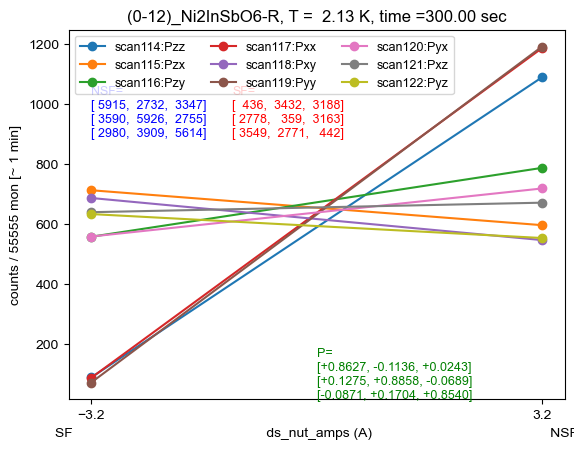

In [615]:
plt.figure()
#plt.title('(0-12)_Ni2InSbO6-R [scan 128:136] T=2.1 K')
plabel=['Pzz','Pzx','Pzy','Pxx','Pxy','Pyy','Pyx','Pxz','Pyz']

u=[]
d=[]
u1=[]#def polamat([scn_Pzz,scn_Pzx,scn_Pzy,scn_Pzy,scn_Pzy,scn_Pzy,scn_Pzy,scn_Pzy,scn_Pzy])

plt.figure()
#plt.title('(0-12)_Ni2InSbO6-R [scan 128:136] T=2.1 K')
plabel=['Pzz','Pzx','Pzy','Pxx','Pxy','Pyy','Pyx','Pxz','Pyz']
P = np.full((3,3), np.nan)
u=[]
d=[]
u1=[]
d1=[]
i=0
for n in range(114,123):    
    try:
        data=read_data(n)
        plt.plot(data['col_ds_nut'],55555*data['col_detector']/data['col_monitor'],'o-', label='scan'+str(n)+':'+plabel[i])
        
        u.append(data['col_detector'][0]/data['col_monitor'][0])
        d.append(data['col_detector'][1]/data['col_monitor'][1])

        u1.append(data['col_detector'][0])
        d1.append(data['col_detector'][1])
        i=i+1
        #print(n)
    except:
        pass
        print(n)
plt.xlabel('SF                                                  ds_nut_amps (A)                                              NSF')
plt.xticks([-3.2,3.2])
plt.ylabel('counts / 55555 mon [~ 1 min]')
plt.legend(fontsize=9, ncol=3)
plt.title(data['subtitle'][:-4]+', T ='+str('%6.2f'%data['sample'])+' K'+', time ='+str('%6.2f'%data['time'])+' sec')
up=np.zeros([3,3])
dn=np.zeros([3,3])
  
up[2,2],up[2,0],up[2,1],up[0,0],up[0,1],up[1,1],up[1,0],up[0,2],up[1,2]=u[0],u[1],u[2],u[3],u[4],u[5],u[6],u[7],u[8]
dn[2,2],dn[2,0],dn[2,1],dn[0,0],dn[0,1],dn[1,1],dn[1,0],dn[0,2],dn[1,2]=d[0],d[1],d[2],d[3],d[4],d[5],d[6],d[7],d[8]

up1=np.zeros([3,3])
dn1=np.zeros([3,3])
   
up1[2,2],up1[2,0],up1[2,1],up1[0,0],up1[0,1],up1[1,1],up1[1,0],up1[0,2],up1[1,2]=u1[0],u1[1],u1[2],u1[3],u1[4],u1[5],u1[6],u1[7],u1[8]
dn1[2,2],dn1[2,0],dn1[2,1],dn1[0,0],dn1[0,1],dn1[1,1],dn1[1,0],dn1[0,2],dn1[1,2]=d1[0],d1[1],d1[2],d1[3],d1[4],d1[5],d1[6],d1[7],d1[8]

P=(up1-dn1)/(up1+dn1)

txt_up='NSF=\n'\
 '['+str('%5d'%up1[0,0])+', '+str('%5d'%up1[0,1])+', '+str('%5d'%up1[0,2])+']'+'\n'\
+'['+str('%5d'%up1[1,0])+', '+str('%5d'%up1[1,1])+', '+str('%5d'%up1[1,2])+']'+'\n'\
+'['+str('%5d'%up1[2,0])+', '+str('%5d'%up1[2,1])+', '+str('%5d'%up1[2,2])+']'

txt_dn='SF=\n'\
 '['+str('%5d'%dn1[0,0])+', '+str('%5d'%dn1[0,1])+', '+str('%5d'%dn1[0,2])+']'+'\n'\
+'['+str('%5d'%dn1[1,0])+', '+str('%5d'%dn1[1,1])+', '+str('%5d'%dn1[1,2])+']'+'\n'\
+'['+str('%5d'%dn1[2,0])+', '+str('%5d'%dn1[2,1])+', '+str('%5d'%dn1[2,2])+']'

txt_P='P=\n'\
 '['+str('%+5.4f'%P[0,0])+', '+str('%+5.4f'%P[0,1])+', '+str('%+5.4f'%P[0,2])+']'+'\n'\
+'['+str('%+5.4f'%P[1,0])+', '+str('%+5.4f'%P[1,1])+', '+str('%+5.4f'%P[1,2])+']'+'\n'\
+'['+str('%+5.4f'%P[2,0])+', '+str('%+5.4f'%P[2,1])+', '+str('%+5.4f'%P[2,2])+']'


plt.text(-3.2, 0.75*55555*np.max(u), txt_up, fontsize=9, color='blue')
plt.text(-1.2, 0.75*55555*np.max(u), txt_dn, fontsize=9, color='red')
plt.text(0, 20, txt_P, fontsize=9, color='green')

plt.savefig('(0-12)_Ni2InSbO6-R_T2K_count300sec.jpg', dpi=600)
plt.show()

# (0-11)_-q_Ni2InSbO6-R [scan 137-145]

C:\Users\num\AppData\Local\Temp\ipykernel_14356\3606654044.py:12: RuntimeWarning: divide by zero encountered in divide
  plt.plot(data['col_ds_nut'],55555*data['col_detector']/data['col_monitor'],'o-', label='scan'+str(n)+':'+plabel[i])
C:\Users\num\AppData\Local\Temp\ipykernel_14356\3606654044.py:14: RuntimeWarning: divide by zero encountered in scalar divide
  u.append(data['col_detector'][0]/data['col_monitor'][0])


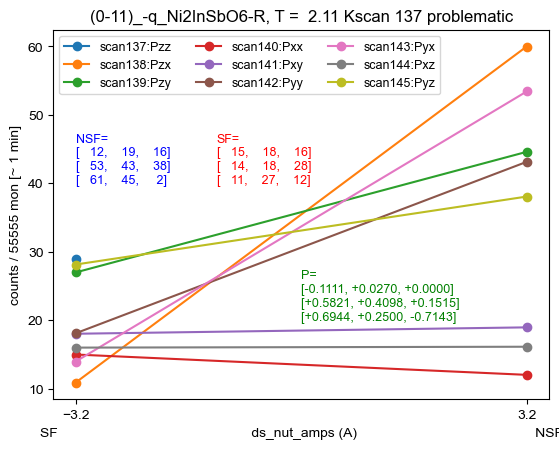

In [587]:

plt.figure()
plabel=['Pzz','Pzx','Pzy','Pxx','Pxy','Pyy','Pyx','Pxz','Pyz']
P = np.full((3,3), np.nan)
u=[]
d=[]
u1=[]
d1=[]
i=0
for n in [137,138,139,140,141,142,143,144,145]:    
    try:
        data=read_data(n)
        plt.plot(data['col_ds_nut'],55555*data['col_detector']/data['col_monitor'],'o-', label='scan'+str(n)+':'+plabel[i])
        
        u.append(data['col_detector'][0]/data['col_monitor'][0])
        d.append(data['col_detector'][1]/data['col_monitor'][1])

        u1.append(data['col_detector'][0])
        d1.append(data['col_detector'][1])
        i=i+1
        #print(n)
    except:
        pass
        print(n)
plt.xlabel('SF                                                  ds_nut_amps (A)                                              NSF')
plt.xticks([-3.2,3.2])
plt.ylabel('counts / 55555 mon [~ 1 min]')
plt.legend(fontsize=9, ncol=3)
plt.title(data['subtitle'][:-4]+', T ='+str('%6.2f'%data['sample'])+' K'+'scan 137 problematic')
up=np.zeros([3,3])
dn=np.zeros([3,3])
  
up[2,2],up[2,0],up[2,1],up[0,0],up[0,1],up[1,1],up[1,0],up[0,2],up[1,2]=u[0],u[1],u[2],u[3],u[4],u[5],u[6],u[7],u[8]
dn[2,2],dn[2,0],dn[2,1],dn[0,0],dn[0,1],dn[1,1],dn[1,0],dn[0,2],dn[1,2]=d[0],d[1],d[2],d[3],d[4],d[5],d[6],d[7],d[8]

up1=np.zeros([3,3])
dn1=np.zeros([3,3])
   
up1[2,2],up1[2,0],up1[2,1],up1[0,0],up1[0,1],up1[1,1],up1[1,0],up1[0,2],up1[1,2]=u1[0],u1[1],u1[2],u1[3],u1[4],u1[5],u1[6],u1[7],u1[8]
dn1[2,2],dn1[2,0],dn1[2,1],dn1[0,0],dn1[0,1],dn1[1,1],dn1[1,0],dn1[0,2],dn1[1,2]=d1[0],d1[1],d1[2],d1[3],d1[4],d1[5],d1[6],d1[7],d1[8]

P=(up1-dn1)/(up1+dn1)

txt_up='NSF=\n'\
 '['+str('%5d'%up1[0,0])+', '+str('%5d'%up1[0,1])+', '+str('%5d'%up1[0,2])+']'+'\n'\
+'['+str('%5d'%up1[1,0])+', '+str('%5d'%up1[1,1])+', '+str('%5d'%up1[1,2])+']'+'\n'\
+'['+str('%5d'%up1[2,0])+', '+str('%5d'%up1[2,1])+', '+str('%5d'%up1[2,2])+']'

txt_dn='SF=\n'\
 '['+str('%5d'%dn1[0,0])+', '+str('%5d'%dn1[0,1])+', '+str('%5d'%dn1[0,2])+']'+'\n'\
+'['+str('%5d'%dn1[1,0])+', '+str('%5d'%dn1[1,1])+', '+str('%5d'%dn1[1,2])+']'+'\n'\
+'['+str('%5d'%dn1[2,0])+', '+str('%5d'%dn1[2,1])+', '+str('%5d'%dn1[2,2])+']'

txt_P='P=\n'\
 '['+str('%+5.4f'%P[0,0])+', '+str('%+5.4f'%P[0,1])+', '+str('%+5.4f'%P[0,2])+']'+'\n'\
+'['+str('%+5.4f'%P[1,0])+', '+str('%+5.4f'%P[1,1])+', '+str('%+5.4f'%P[1,2])+']'+'\n'\
+'['+str('%+5.4f'%P[2,0])+', '+str('%+5.4f'%P[2,1])+', '+str('%+5.4f'%P[2,2])+']'


plt.text(-3.2, 40, txt_up, fontsize=9, color='blue')
plt.text(-1.2, 40, txt_dn, fontsize=9, color='red')
plt.text(0, 20, txt_P, fontsize=9, color='green')
plt.show()

# (0-11)_-q_Ni2InSbO6-R [scan 146-154]

52.94494949209521


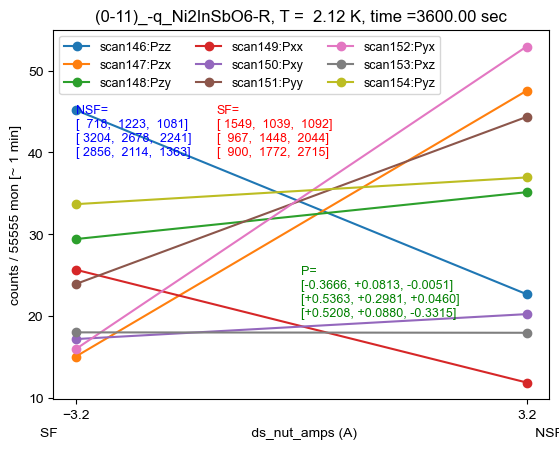

In [588]:
#def polamat([scn_Pzz,scn_Pzx,scn_Pzy,scn_Pzy,scn_Pzy,scn_Pzy,scn_Pzy,scn_Pzy,scn_Pzy])

plt.figure()
#plt.title('(0-12)_Ni2InSbO6-R [scan 128:136] T=2.1 K')
plabel=['Pzz','Pzx','Pzy','Pxx','Pxy','Pyy','Pyx','Pxz','Pyz']
P = np.full((3,3), np.nan)
u=[]
d=[]
u1=[]
d1=[]
i=0
for n in [146,147,148,149,150,151,152,153,154]:    
    try:
        data=read_data(n)
        plt.plot(data['col_ds_nut'],55555*data['col_detector']/data['col_monitor'],'o-', label='scan'+str(n)+':'+plabel[i])
        
        u.append(data['col_detector'][0]/data['col_monitor'][0])
        d.append(data['col_detector'][1]/data['col_monitor'][1])

        u1.append(data['col_detector'][0])
        d1.append(data['col_detector'][1])
        i=i+1
        #print(n)
    except:
        pass
        print(n)
plt.xlabel('SF                                                  ds_nut_amps (A)                                              NSF')
plt.xticks([-3.2,3.2])
plt.ylabel('counts / 55555 mon [~ 1 min]')
plt.legend(fontsize=9, ncol=3)
plt.title(data['subtitle'][:-4]+', T ='+str('%6.2f'%data['sample'])+' K'+', time ='+str('%6.2f'%data['time'])+' sec')
up=np.zeros([3,3])
dn=np.zeros([3,3])
  
up[2,2],up[2,0],up[2,1],up[0,0],up[0,1],up[1,1],up[1,0],up[0,2],up[1,2]=u[0],u[1],u[2],u[3],u[4],u[5],u[6],u[7],u[8]
dn[2,2],dn[2,0],dn[2,1],dn[0,0],dn[0,1],dn[1,1],dn[1,0],dn[0,2],dn[1,2]=d[0],d[1],d[2],d[3],d[4],d[5],d[6],d[7],d[8]

up1=np.zeros([3,3])
dn1=np.zeros([3,3])
   
up1[2,2],up1[2,0],up1[2,1],up1[0,0],up1[0,1],up1[1,1],up1[1,0],up1[0,2],up1[1,2]=u1[0],u1[1],u1[2],u1[3],u1[4],u1[5],u1[6],u1[7],u1[8]
dn1[2,2],dn1[2,0],dn1[2,1],dn1[0,0],dn1[0,1],dn1[1,1],dn1[1,0],dn1[0,2],dn1[1,2]=d1[0],d1[1],d1[2],d1[3],d1[4],d1[5],d1[6],d1[7],d1[8]

P=(up1-dn1)/(up1+dn1)

txt_up='NSF=\n'\
 '['+str('%5d'%up1[0,0])+', '+str('%5d'%up1[0,1])+', '+str('%5d'%up1[0,2])+']'+'\n'\
+'['+str('%5d'%up1[1,0])+', '+str('%5d'%up1[1,1])+', '+str('%5d'%up1[1,2])+']'+'\n'\
+'['+str('%5d'%up1[2,0])+', '+str('%5d'%up1[2,1])+', '+str('%5d'%up1[2,2])+']'

txt_dn='SF=\n'\
 '['+str('%5d'%dn1[0,0])+', '+str('%5d'%dn1[0,1])+', '+str('%5d'%dn1[0,2])+']'+'\n'\
+'['+str('%5d'%dn1[1,0])+', '+str('%5d'%dn1[1,1])+', '+str('%5d'%dn1[1,2])+']'+'\n'\
+'['+str('%5d'%dn1[2,0])+', '+str('%5d'%dn1[2,1])+', '+str('%5d'%dn1[2,2])+']'

txt_P='P=\n'\
 '['+str('%+5.4f'%P[0,0])+', '+str('%+5.4f'%P[0,1])+', '+str('%+5.4f'%P[0,2])+']'+'\n'\
+'['+str('%+5.4f'%P[1,0])+', '+str('%+5.4f'%P[1,1])+', '+str('%+5.4f'%P[1,2])+']'+'\n'\
+'['+str('%+5.4f'%P[2,0])+', '+str('%+5.4f'%P[2,1])+', '+str('%+5.4f'%P[2,2])+']'

print(55555*np.max(u))
plt.text(-3.2, 0.75*55555*np.max(u), txt_up, fontsize=9, color='blue')
plt.text(-1.2, 0.75*55555*np.max(u), txt_dn, fontsize=9, color='red')
plt.text(0, 20, txt_P, fontsize=9, color='green')

#plt.savefig('(0-11)_-q_Ni2InSbO6-R_T2K_count3600sec.jpg', dpi=600)
plt.show()

saved as: _T100Kcount60sec.jpg


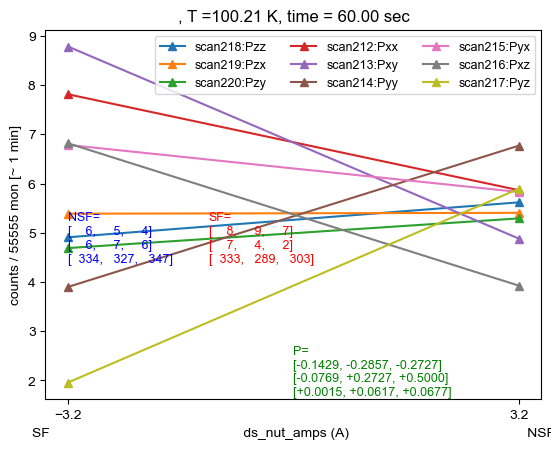

In [647]:
scan2pol(218,219,220,212,213,214,215,216,217)

# (011)_-q_Ni2InSbO6-R  [scan 163-171]

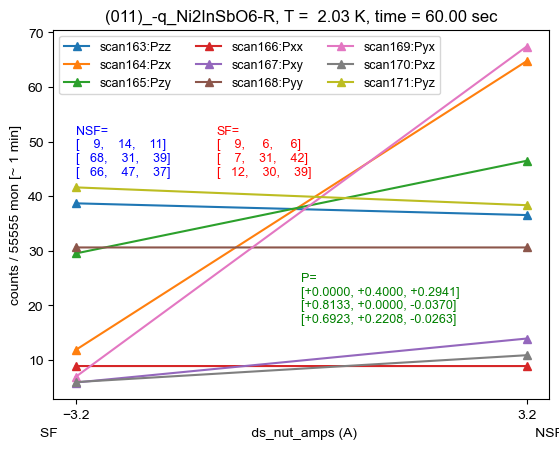

In [592]:
#def polamat([scn_Pzz,scn_Pzx,scn_Pzy,scn_Pzy,scn_Pzy,scn_Pzy,scn_Pzy,scn_Pzy,scn_Pzy])

plt.figure()
#plt.title('(0-12)_Ni2InSbO6-R [scan 128:136] T=2.1 K')
plabel=['Pzz','Pzx','Pzy','Pxx','Pxy','Pyy','Pyx','Pxz','Pyz']
P = np.full((3,3), np.nan)
u=[]
d=[]
u1=[]
d1=[]
i=0
for n in range(163,172):    
    try:
        data=read_data(n)
        plt.plot(data['col_ds_nut'],55555*data['col_detector']/data['col_monitor'],'^-', label='scan'+str(n)+':'+plabel[i])
        
        u.append(data['col_detector'][0]/data['col_monitor'][0])
        d.append(data['col_detector'][1]/data['col_monitor'][1])

        u1.append(data['col_detector'][0])
        d1.append(data['col_detector'][1])
        i=i+1
        #print(n)
    except:
        pass
        print(n)
plt.xlabel('SF                                                  ds_nut_amps (A)                                              NSF')
plt.xticks([-3.2,3.2])
plt.ylabel('counts / 55555 mon [~ 1 min]')
plt.legend(fontsize=9, ncol=3)
plt.title(data['subtitle'][:-4]+', T ='+str('%6.2f'%data['sample'])+' K'+', time ='+str('%6.2f'%data['time'])+' sec')
up=np.zeros([3,3])
dn=np.zeros([3,3])
  
up[2,2],up[2,0],up[2,1],up[0,0],up[0,1],up[1,1],up[1,0],up[0,2],up[1,2]=u[0],u[1],u[2],u[3],u[4],u[5],u[6],u[7],u[8]
dn[2,2],dn[2,0],dn[2,1],dn[0,0],dn[0,1],dn[1,1],dn[1,0],dn[0,2],dn[1,2]=d[0],d[1],d[2],d[3],d[4],d[5],d[6],d[7],d[8]

up1=np.zeros([3,3])
dn1=np.zeros([3,3])
   
up1[2,2],up1[2,0],up1[2,1],up1[0,0],up1[0,1],up1[1,1],up1[1,0],up1[0,2],up1[1,2]=u1[0],u1[1],u1[2],u1[3],u1[4],u1[5],u1[6],u1[7],u1[8]
dn1[2,2],dn1[2,0],dn1[2,1],dn1[0,0],dn1[0,1],dn1[1,1],dn1[1,0],dn1[0,2],dn1[1,2]=d1[0],d1[1],d1[2],d1[3],d1[4],d1[5],d1[6],d1[7],d1[8]

P=(up1-dn1)/(up1+dn1)

txt_up='NSF=\n'\
 '['+str('%5d'%up1[0,0])+', '+str('%5d'%up1[0,1])+', '+str('%5d'%up1[0,2])+']'+'\n'\
+'['+str('%5d'%up1[1,0])+', '+str('%5d'%up1[1,1])+', '+str('%5d'%up1[1,2])+']'+'\n'\
+'['+str('%5d'%up1[2,0])+', '+str('%5d'%up1[2,1])+', '+str('%5d'%up1[2,2])+']'

txt_dn='SF=\n'\
 '['+str('%5d'%dn1[0,0])+', '+str('%5d'%dn1[0,1])+', '+str('%5d'%dn1[0,2])+']'+'\n'\
+'['+str('%5d'%dn1[1,0])+', '+str('%5d'%dn1[1,1])+', '+str('%5d'%dn1[1,2])+']'+'\n'\
+'['+str('%5d'%dn1[2,0])+', '+str('%5d'%dn1[2,1])+', '+str('%5d'%dn1[2,2])+']'

txt_P='P=\n'\
 '['+str('%+5.4f'%P[0,0])+', '+str('%+5.4f'%P[0,1])+', '+str('%+5.4f'%P[0,2])+']'+'\n'\
+'['+str('%+5.4f'%P[1,0])+', '+str('%+5.4f'%P[1,1])+', '+str('%+5.4f'%P[1,2])+']'+'\n'\
+'['+str('%+5.4f'%P[2,0])+', '+str('%+5.4f'%P[2,1])+', '+str('%+5.4f'%P[2,2])+']'


plt.text(-3.2, 0.65*55555*np.max(u), txt_up, fontsize=9, color='blue')
plt.text(-1.2, 0.65*55555*np.max(u), txt_dn, fontsize=9, color='red')
plt.text(0, 0.25*55555*np.max(u), txt_P, fontsize=9, color='green')

plt.savefig('(011)_-q_Ni2InSbO6-R_T2K_count60sec.jpg', dpi=600)
plt.show()

# (011) scans Only magnetic

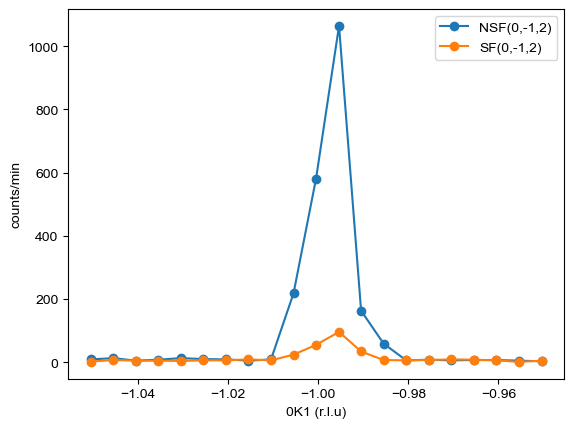

In [622]:


plt.figure()
data=read_data(100)
plt.plot(data['col_k'], data['col_detector'],'-o', label='NSF(0,-1,2)')
data=read_data(101)
plt.plot(data['col_k'], data['col_detector'],'-o', label='SF(0,-1,2)')
plt.xlabel('0K1 (r.l.u)')
plt.ylabel('counts/min')
plt.legend()
plt.show()



In [620]:
data['meta']

{'instrument': 'TAIPAN',
 'filenumber': 100,
 'date': '6/13/2024',
 'time': 60.0,
 'proposal': '32196',
 'experiment': '943',
 'experiment_number': '943',
 'command': 'scan h 0 k -0.95 -1.05 0.005  l 2 e 0 preset time 60',
 'builtin_command': 'scan h 0 k -0.95 -1.05 0.005 l 2 e 0 preset time 60',
 'users': 'James Beare, Junjie Yang, Masaaki Matsuda, Chenyang Jiang, Yunpeng Gao',
 'local_contact': 'Masa Matsuda',
 'subtitle': 'Ni2InSbO6_R_2K_0-12_th2th_1min',
 'monochromator': 'Heusler',
 'analyzer': 'Heusler',
 'sense': '+-+',
 'collimation': '48-80-60-999',
 'samplename': 'Si',
 'sampletype': 'crystal',
 'samplemosaic': '30.000000',
 'latticeconstants': '5.190272,5.190272,14.032562,90.000000,90.000000,120.000000',
 'ubmatrix': '-0.006863,-0.021086,0.070929,-0.112404,-0.221467,-0.006744,0.191867,-0.001517,-0.001414',
 'mode': '0',
 'plane_normal': '0.011994,-0.005443,0.627796',
 'ubconf': 'UB13Jun2024_43053PM.ini',
 'preset_type': 'normal',
 'preset_channel': 'time',
 'preset_value': '

# (011)_-q_Ni2InSbO6-R  [scan 172-180]

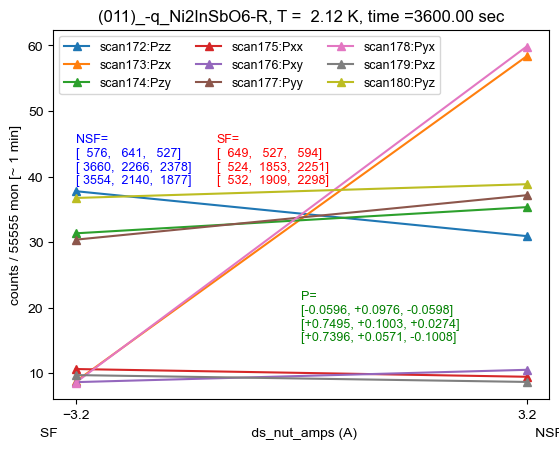

In [593]:
#def polamat([scn_Pzz,scn_Pzx,scn_Pzy,scn_Pzy,scn_Pzy,scn_Pzy,scn_Pzy,scn_Pzy,scn_Pzy])

plt.figure()
#plt.title('(0-12)_Ni2InSbO6-R [scan 128:136] T=2.1 K')
plabel=['Pzz','Pzx','Pzy','Pxx','Pxy','Pyy','Pyx','Pxz','Pyz']
P = np.full((3,3), np.nan)
u=[]
d=[]
u1=[]
d1=[]
i=0
for n in [172,173,174,175,176,177,178,179,180]:    
    try:
        data=read_data(n)
        plt.plot(data['col_ds_nut'],55555*data['col_detector']/data['col_monitor'],'^-', label='scan'+str(n)+':'+plabel[i])
        
        u.append(data['col_detector'][0]/data['col_monitor'][0])
        d.append(data['col_detector'][1]/data['col_monitor'][1])

        u1.append(data['col_detector'][0])
        d1.append(data['col_detector'][1])
        i=i+1
        #print(n)
    except:
        pass
        print(n)
plt.xlabel('SF                                                  ds_nut_amps (A)                                              NSF')
plt.xticks([-3.2,3.2])
plt.ylabel('counts / 55555 mon [~ 1 min]')
plt.legend(fontsize=9, ncol=3)
plt.title(data['subtitle'][:-4]+', T ='+str('%6.2f'%data['sample'])+' K'+', time ='+str('%6.2f'%data['time'])+' sec')
up=np.zeros([3,3])
dn=np.zeros([3,3])
  
up[2,2],up[2,0],up[2,1],up[0,0],up[0,1],up[1,1],up[1,0],up[0,2],up[1,2]=u[0],u[1],u[2],u[3],u[4],u[5],u[6],u[7],u[8]
dn[2,2],dn[2,0],dn[2,1],dn[0,0],dn[0,1],dn[1,1],dn[1,0],dn[0,2],dn[1,2]=d[0],d[1],d[2],d[3],d[4],d[5],d[6],d[7],d[8]

up1=np.zeros([3,3])
dn1=np.zeros([3,3])
   
up1[2,2],up1[2,0],up1[2,1],up1[0,0],up1[0,1],up1[1,1],up1[1,0],up1[0,2],up1[1,2]=u1[0],u1[1],u1[2],u1[3],u1[4],u1[5],u1[6],u1[7],u1[8]
dn1[2,2],dn1[2,0],dn1[2,1],dn1[0,0],dn1[0,1],dn1[1,1],dn1[1,0],dn1[0,2],dn1[1,2]=d1[0],d1[1],d1[2],d1[3],d1[4],d1[5],d1[6],d1[7],d1[8]

P=(up1-dn1)/(up1+dn1)

txt_up='NSF=\n'\
 '['+str('%5d'%up1[0,0])+', '+str('%5d'%up1[0,1])+', '+str('%5d'%up1[0,2])+']'+'\n'\
+'['+str('%5d'%up1[1,0])+', '+str('%5d'%up1[1,1])+', '+str('%5d'%up1[1,2])+']'+'\n'\
+'['+str('%5d'%up1[2,0])+', '+str('%5d'%up1[2,1])+', '+str('%5d'%up1[2,2])+']'

txt_dn='SF=\n'\
 '['+str('%5d'%dn1[0,0])+', '+str('%5d'%dn1[0,1])+', '+str('%5d'%dn1[0,2])+']'+'\n'\
+'['+str('%5d'%dn1[1,0])+', '+str('%5d'%dn1[1,1])+', '+str('%5d'%dn1[1,2])+']'+'\n'\
+'['+str('%5d'%dn1[2,0])+', '+str('%5d'%dn1[2,1])+', '+str('%5d'%dn1[2,2])+']'

txt_P='P=\n'\
 '['+str('%+5.4f'%P[0,0])+', '+str('%+5.4f'%P[0,1])+', '+str('%+5.4f'%P[0,2])+']'+'\n'\
+'['+str('%+5.4f'%P[1,0])+', '+str('%+5.4f'%P[1,1])+', '+str('%+5.4f'%P[1,2])+']'+'\n'\
+'['+str('%+5.4f'%P[2,0])+', '+str('%+5.4f'%P[2,1])+', '+str('%+5.4f'%P[2,2])+']'


plt.text(-3.2, 0.65*55555*np.max(u), txt_up, fontsize=9, color='blue')
plt.text(-1.2, 0.65*55555*np.max(u), txt_dn, fontsize=9, color='red')
plt.text(0, 0.25*55555*np.max(u), txt_P, fontsize=9, color='green')

plt.savefig('(011)_-q_Ni2InSbO6-R_T2K_count3600sec.jpg', dpi=600)
plt.show()

# (011)_+q_Ni2InSbO6-R  [scan 181-189]

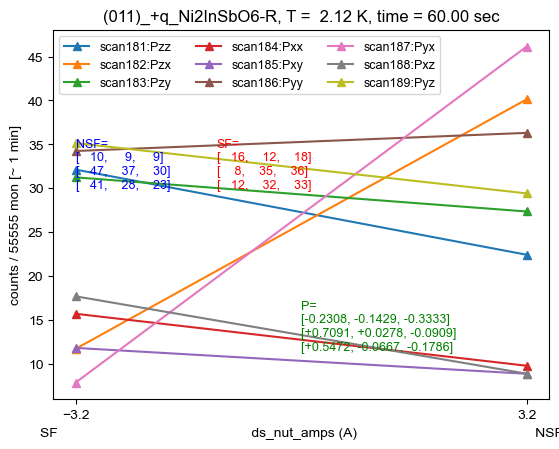

In [594]:
#def polamat([scn_Pzz,scn_Pzx,scn_Pzy,scn_Pzy,scn_Pzy,scn_Pzy,scn_Pzy,scn_Pzy,scn_Pzy])

plt.figure()
#plt.title('(0-12)_Ni2InSbO6-R [scan 128:136] T=2.1 K')
plabel=['Pzz','Pzx','Pzy','Pxx','Pxy','Pyy','Pyx','Pxz','Pyz']
P = np.full((3,3), np.nan)
u=[]
d=[]
u1=[]
d1=[]
i=0
for n in [181,182,183,184,185,186,187,188,189]:    
    try:
        data=read_data(n)
        plt.plot(data['col_ds_nut'],55555*data['col_detector']/data['col_monitor'],'^-', label='scan'+str(n)+':'+plabel[i])
        
        u.append(data['col_detector'][0]/data['col_monitor'][0])
        d.append(data['col_detector'][1]/data['col_monitor'][1])

        u1.append(data['col_detector'][0])
        d1.append(data['col_detector'][1])
        i=i+1
        #print(n)
    except:
        pass
        print(n)
plt.xlabel('SF                                                  ds_nut_amps (A)                                              NSF')
plt.xticks([-3.2,3.2])
plt.ylabel('counts / 55555 mon [~ 1 min]')
plt.legend(fontsize=9, ncol=3)
plt.title(data['subtitle'][:-4]+', T ='+str('%6.2f'%data['sample'])+' K'+', time ='+str('%6.2f'%data['time'])+' sec')
up=np.zeros([3,3])
dn=np.zeros([3,3])
  
up[2,2],up[2,0],up[2,1],up[0,0],up[0,1],up[1,1],up[1,0],up[0,2],up[1,2]=u[0],u[1],u[2],u[3],u[4],u[5],u[6],u[7],u[8]
dn[2,2],dn[2,0],dn[2,1],dn[0,0],dn[0,1],dn[1,1],dn[1,0],dn[0,2],dn[1,2]=d[0],d[1],d[2],d[3],d[4],d[5],d[6],d[7],d[8]

up1=np.zeros([3,3])
dn1=np.zeros([3,3])
   
up1[2,2],up1[2,0],up1[2,1],up1[0,0],up1[0,1],up1[1,1],up1[1,0],up1[0,2],up1[1,2]=u1[0],u1[1],u1[2],u1[3],u1[4],u1[5],u1[6],u1[7],u1[8]
dn1[2,2],dn1[2,0],dn1[2,1],dn1[0,0],dn1[0,1],dn1[1,1],dn1[1,0],dn1[0,2],dn1[1,2]=d1[0],d1[1],d1[2],d1[3],d1[4],d1[5],d1[6],d1[7],d1[8]

P=(up1-dn1)/(up1+dn1)

txt_up='NSF=\n'\
 '['+str('%5d'%up1[0,0])+', '+str('%5d'%up1[0,1])+', '+str('%5d'%up1[0,2])+']'+'\n'\
+'['+str('%5d'%up1[1,0])+', '+str('%5d'%up1[1,1])+', '+str('%5d'%up1[1,2])+']'+'\n'\
+'['+str('%5d'%up1[2,0])+', '+str('%5d'%up1[2,1])+', '+str('%5d'%up1[2,2])+']'

txt_dn='SF=\n'\
 '['+str('%5d'%dn1[0,0])+', '+str('%5d'%dn1[0,1])+', '+str('%5d'%dn1[0,2])+']'+'\n'\
+'['+str('%5d'%dn1[1,0])+', '+str('%5d'%dn1[1,1])+', '+str('%5d'%dn1[1,2])+']'+'\n'\
+'['+str('%5d'%dn1[2,0])+', '+str('%5d'%dn1[2,1])+', '+str('%5d'%dn1[2,2])+']'

txt_P='P=\n'\
 '['+str('%+5.4f'%P[0,0])+', '+str('%+5.4f'%P[0,1])+', '+str('%+5.4f'%P[0,2])+']'+'\n'\
+'['+str('%+5.4f'%P[1,0])+', '+str('%+5.4f'%P[1,1])+', '+str('%+5.4f'%P[1,2])+']'+'\n'\
+'['+str('%+5.4f'%P[2,0])+', '+str('%+5.4f'%P[2,1])+', '+str('%+5.4f'%P[2,2])+']'


plt.text(-3.2, 0.65*55555*np.max(u), txt_up, fontsize=9, color='blue')
plt.text(-1.2, 0.65*55555*np.max(u), txt_dn, fontsize=9, color='red')
plt.text(0, 0.25*55555*np.max(u), txt_P, fontsize=9, color='green')

plt.savefig('(011)_+q_Ni2InSbO6-R_T2K_count60sec.jpg', dpi=600)
plt.show()

# (011)_+q_Ni2InSbO6-R  [scan 190-198]

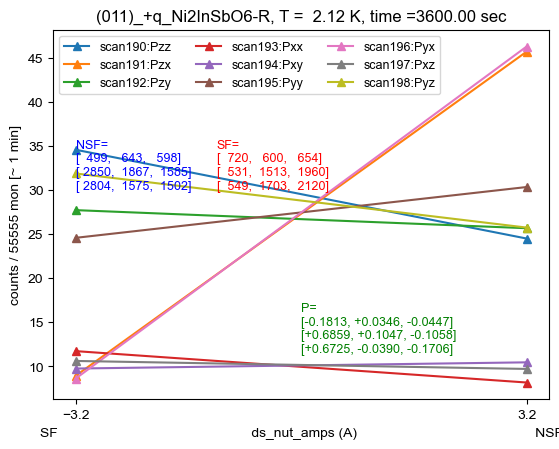

In [627]:
#def polamat([scn_Pzz,scn_Pzx,scn_Pzy,scn_Pzy,scn_Pzy,scn_Pzy,scn_Pzy,scn_Pzy,scn_Pzy])

plt.figure()
#plt.title('(0-12)_Ni2InSbO6-R [scan 128:136] T=2.1 K')
plabel=['Pzz','Pzx','Pzy','Pxx','Pxy','Pyy','Pyx','Pxz','Pyz']
P = np.full((3,3), np.nan)
u=[]
d=[]
u1=[]
d1=[]
i=0
for n in [190,191,192,193,194,195,196,197,198]:    
    try:
        data=read_data(n)
        plt.plot(data['col_ds_nut'],55555*data['col_detector']/data['col_monitor'],'^-', label='scan'+str(n)+':'+plabel[i])
        
        u.append(data['col_detector'][0]/data['col_monitor'][0])
        d.append(data['col_detector'][1]/data['col_monitor'][1])

        u1.append(data['col_detector'][0])
        d1.append(data['col_detector'][1])
        i=i+1
        #print(n)
    except:
        pass
        print(n)
plt.xlabel('SF                                                  ds_nut_amps (A)                                              NSF')
plt.xticks([-3.2,3.2])
plt.ylabel('counts / 55555 mon [~ 1 min]')
plt.legend(fontsize=9, ncol=3)
plt.title(data['subtitle'][:-4]+', T ='+str('%6.2f'%data['sample'])+' K'+', time ='+str('%6.2f'%data['time'])+' sec')
up=np.zeros([3,3])
dn=np.zeros([3,3])
  
up[2,2],up[2,0],up[2,1],up[0,0],up[0,1],up[1,1],up[1,0],up[0,2],up[1,2]=u[0],u[1],u[2],u[3],u[4],u[5],u[6],u[7],u[8]
dn[2,2],dn[2,0],dn[2,1],dn[0,0],dn[0,1],dn[1,1],dn[1,0],dn[0,2],dn[1,2]=d[0],d[1],d[2],d[3],d[4],d[5],d[6],d[7],d[8]

up1=np.zeros([3,3])
dn1=np.zeros([3,3])
   
up1[2,2],up1[2,0],up1[2,1],up1[0,0],up1[0,1],up1[1,1],up1[1,0],up1[0,2],up1[1,2]=u1[0],u1[1],u1[2],u1[3],u1[4],u1[5],u1[6],u1[7],u1[8]
dn1[2,2],dn1[2,0],dn1[2,1],dn1[0,0],dn1[0,1],dn1[1,1],dn1[1,0],dn1[0,2],dn1[1,2]=d1[0],d1[1],d1[2],d1[3],d1[4],d1[5],d1[6],d1[7],d1[8]

P=(up1-dn1)/(up1+dn1)

txt_up='NSF=\n'\
 '['+str('%5d'%up1[0,0])+', '+str('%5d'%up1[0,1])+', '+str('%5d'%up1[0,2])+']'+'\n'\
+'['+str('%5d'%up1[1,0])+', '+str('%5d'%up1[1,1])+', '+str('%5d'%up1[1,2])+']'+'\n'\
+'['+str('%5d'%up1[2,0])+', '+str('%5d'%up1[2,1])+', '+str('%5d'%up1[2,2])+']'

txt_dn='SF=\n'\
 '['+str('%5d'%dn1[0,0])+', '+str('%5d'%dn1[0,1])+', '+str('%5d'%dn1[0,2])+']'+'\n'\
+'['+str('%5d'%dn1[1,0])+', '+str('%5d'%dn1[1,1])+', '+str('%5d'%dn1[1,2])+']'+'\n'\
+'['+str('%5d'%dn1[2,0])+', '+str('%5d'%dn1[2,1])+', '+str('%5d'%dn1[2,2])+']'

txt_P='P=\n'\
 '['+str('%+5.4f'%P[0,0])+', '+str('%+5.4f'%P[0,1])+', '+str('%+5.4f'%P[0,2])+']'+'\n'\
+'['+str('%+5.4f'%P[1,0])+', '+str('%+5.4f'%P[1,1])+', '+str('%+5.4f'%P[1,2])+']'+'\n'\
+'['+str('%+5.4f'%P[2,0])+', '+str('%+5.4f'%P[2,1])+', '+str('%+5.4f'%P[2,2])+']'


plt.text(-3.2, 0.65*55555*np.max(u), txt_up, fontsize=9, color='blue')
plt.text(-1.2, 0.65*55555*np.max(u), txt_dn, fontsize=9, color='red')
plt.text(0, 0.25*55555*np.max(u), txt_P, fontsize=9, color='green')

plt.savefig('(011)_+q_Ni2InSbO6-R_T2K_count3660sec.jpg', dpi=600)
plt.show()

In [639]:
#def polamat([scn_Pzz,scn_Pzx,scn_Pzy,scn_Pzy,scn_Pzy,scn_Pzy,scn_Pzy,scn_Pzy,scn_Pzy])
def scan2pol(scn_Pzz,scn_Pzx,scn_Pzy,scn_Pxx,scn_Pxy,scn_Pyy,scn_Pyx,scn_Pxz,scn_Pyz):
    plabel=['Pzz','Pzx','Pzy','Pxx','Pxy','Pyy','Pyx','Pxz','Pyz']
    P = np.full((3,3), np.nan)
    u=[]
    d=[]
    u1=[]
    d1=[]
    i=0
    for n in [scn_Pzz,scn_Pzx,scn_Pzy,scn_Pxx,scn_Pxy,scn_Pyy,scn_Pyx,scn_Pxz,scn_Pyz]:    
        try:
            data=read_data(n)
            plt.plot(data['col_ds_nut'],55555*data['col_detector']/data['col_monitor'],'^-', label='scan'+str(n)+':'+plabel[i])
            
            u.append(data['col_detector'][0]/data['col_monitor'][0])
            d.append(data['col_detector'][1]/data['col_monitor'][1])
    
            u1.append(data['col_detector'][0])
            d1.append(data['col_detector'][1])
            i=i+1
            #print(n)
        except:
            pass
            print(n)
    plt.xlabel('SF                                                  ds_nut_amps (A)                                              NSF')
    plt.xticks([-3.2,3.2])
    plt.ylabel('counts / 55555 mon [~ 1 min]')
    plt.legend(fontsize=9, ncol=3)
    plt.title(data['subtitle'][:-4]+', T ='+str('%6.2f'%data['sample'])+' K'+', time ='+str('%6.2f'%data['time'])+' sec')
    up=np.zeros([3,3])
    dn=np.zeros([3,3])
      
    up[2,2],up[2,0],up[2,1],up[0,0],up[0,1],up[1,1],up[1,0],up[0,2],up[1,2]=u[0],u[1],u[2],u[3],u[4],u[5],u[6],u[7],u[8]
    dn[2,2],dn[2,0],dn[2,1],dn[0,0],dn[0,1],dn[1,1],dn[1,0],dn[0,2],dn[1,2]=d[0],d[1],d[2],d[3],d[4],d[5],d[6],d[7],d[8]
    
    up1=np.zeros([3,3])
    dn1=np.zeros([3,3])
       
    up1[2,2],up1[2,0],up1[2,1],up1[0,0],up1[0,1],up1[1,1],up1[1,0],up1[0,2],up1[1,2]=u1[0],u1[1],u1[2],u1[3],u1[4],u1[5],u1[6],u1[7],u1[8]
    dn1[2,2],dn1[2,0],dn1[2,1],dn1[0,0],dn1[0,1],dn1[1,1],dn1[1,0],dn1[0,2],dn1[1,2]=d1[0],d1[1],d1[2],d1[3],d1[4],d1[5],d1[6],d1[7],d1[8]
    
    P=(up1-dn1)/(up1+dn1)
    
    txt_up='NSF=\n'\
     '['+str('%5d'%up1[0,0])+', '+str('%5d'%up1[0,1])+', '+str('%5d'%up1[0,2])+']'+'\n'\
    +'['+str('%5d'%up1[1,0])+', '+str('%5d'%up1[1,1])+', '+str('%5d'%up1[1,2])+']'+'\n'\
    +'['+str('%5d'%up1[2,0])+', '+str('%5d'%up1[2,1])+', '+str('%5d'%up1[2,2])+']'
    
    txt_dn='SF=\n'\
     '['+str('%5d'%dn1[0,0])+', '+str('%5d'%dn1[0,1])+', '+str('%5d'%dn1[0,2])+']'+'\n'\
    +'['+str('%5d'%dn1[1,0])+', '+str('%5d'%dn1[1,1])+', '+str('%5d'%dn1[1,2])+']'+'\n'\
    +'['+str('%5d'%dn1[2,0])+', '+str('%5d'%dn1[2,1])+', '+str('%5d'%dn1[2,2])+']'

    txt_P='P=\n'\
     '['+str('%+5.4f'%P[0,0])+', '+str('%+5.4f'%P[0,1])+', '+str('%+5.4f'%P[0,2])+']'+'\n'\
    +'['+str('%+5.4f'%P[1,0])+', '+str('%+5.4f'%P[1,1])+', '+str('%+5.4f'%P[1,2])+']'+'\n'\
    +'['+str('%+5.4f'%P[2,0])+', '+str('%+5.4f'%P[2,1])+', '+str('%+5.4f'%P[2,2])+']'
    
    
    plt.text(-3.2, 0.65*55555*np.max(u), txt_up, fontsize=9, color='blue')
    plt.text(-1.2, 0.65*55555*np.max(u), txt_dn, fontsize=9, color='red')
    plt.text(0, 0.25*55555*np.max(u), txt_P, fontsize=9, color='green')
    
    figname=data['subtitle'][:-4]+'_T'+str(int(data['sample']))+'K'+'count'+str(int(data['time']))+'sec.jpg'
    
    print('saved as:',figname)
    plt.savefig(figname, dpi=600)
    plt.show()

saved as: (011)_+q_Ni2InSbO6-R_T2Kcount3600sec.jpg


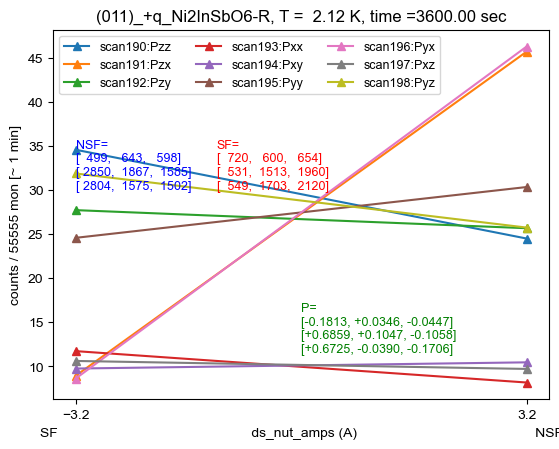

saved as: (011)_-q_Ni2InSbO6-R_T2Kcount3600sec.jpg


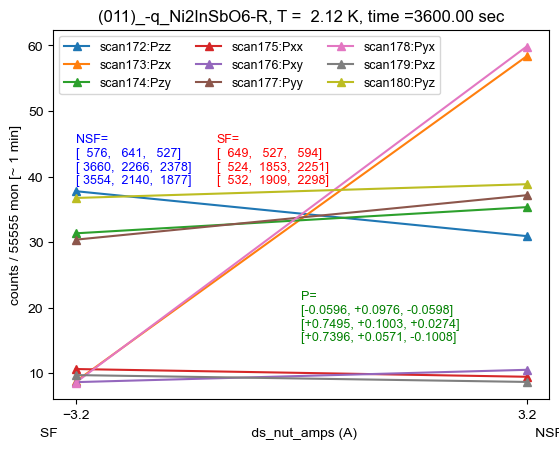

In [640]:
plt.figure()
scn_Pzz,scn_Pzx,scn_Pzy,scn_Pxx,scn_Pxy,scn_Pyy,scn_Pyx,scn_Pxz,scn_Pyz=190,191,192,193,194,195,196,197,198
scan2pol(scn_Pzz,scn_Pzx,scn_Pzy,scn_Pxx,scn_Pxy,scn_Pyy,scn_Pyx,scn_Pxz,scn_Pyz)
scn_Pzz,scn_Pzx,scn_Pzy,scn_Pxx,scn_Pxy,scn_Pyy,scn_Pyx,scn_Pxz,scn_Pyz=172,173,174,175,176,177,178,179,180
scan2pol(scn_Pzz,scn_Pzx,scn_Pzy,scn_Pxx,scn_Pxy,scn_Pyy,scn_Pyx,scn_Pxz,scn_Pyz)

# Extra

In [550]:
hosts = raw_input("enter hosts (separated by a comma):")
scn_Pzz,scn_Pzx,scn_Pzy,scn_Pzy,scn_Pzy,scn_Pzy,scn_Pzy,scn_Pzy,scn_Pzy = map(int, hosts.split())   # assigns integer input values to variables a, b and c

NameError: name 'raw_input' is not defined

In [453]:
host_string = raw_input("enter hosts (separated by a comma):")
hosts = hosts_string.split(',')
if 

NameError: name 'raw_input' is not defined

In [476]:
hosts = input("enter file#s (separated by a comma) in the following order:\n'Pzz','Pzx','Pzy','Pxx','Pxy','Pyy','Pyx','Pxz','Pyz'\n").split(',')

enter file# (separated by a comma) in the following order:
'Pzz','Pzx','Pzy','Pxx','Pxy','Pyy','Pyx','Pxz','Pyz'
 1,2,3,4,5,6,7,8,9


In [464]:
scn_Pzz,scn_Pzx,scn_Pzy,scn_Pzy,scn_Pzy,scn_Pzy,scn_Pzy,scn_Pzy,scn_Pzy = hosts.split(',') 

In [465]:
scn_Pzz,scn_Pzx,scn_Pzy,scn_Pzy,scn_Pzy,scn_Pzy,scn_Pzy,scn_Pzy,scn_Pzy

('1', '2', '9', '9', '9', '9', '9', '9', '9')

In [469]:
hosts

['1', '2', '3', '4', '5', '6', '7', '8', '9']

In [472]:
int(hosts[8])

9

In [480]:
files = input("enter file#s (separated by a comma) in the following order:\n'Pzz','Pzx','Pzy','Pxx','Pxy','Pyy','Pyx','Pxz','Pyz'\n").split(',')
if len(files) < 9 or len(files)>9:
    print('Numebr of files must be 9!!')    
    files = input("enter file#s (separated by a comma) in the following order:\n'Pzz','Pzx','Pzy','Pxx','Pxy','Pyy','Pyx','Pxz','Pyz'\n").split(',')
    
#def polamat([scn_Pzz,scn_Pzx,scn_Pzy,scn_Pzy,scn_Pzy,scn_Pzy,scn_Pzy,scn_Pzy,scn_Pzy])

plt.figure()
#plt.title('(0-12)_Ni2InSbO6-R [scan 128:136] T=2.1 K')
plabel=['Pzz','Pzx','Pzy','Pxx','Pxy','Pyy','Pyx','Pxz','Pyz']
P = np.full((3,3), np.nan)
up = np.full((3,3), np.nan)
dn = np.full((3,3), np.nan)
up1 = np.full((3,3), np.nan)
dn1 = np.full((3,3), np.nan)

u=[]
d=[]
u1=[]
d1=[]
i=0
for n in range(163,172):    
    try:
        data=read_data(n)
        plt.plot(data['col_ds_nut'],55555*data['col_detector']/data['col_monitor'],'^-', label='scan'+str(n)+':'+plabel[i])
        
        u.append(data['col_detector'][0]/data['col_monitor'][0])
        d.append(data['col_detector'][1]/data['col_monitor'][1])

        u1.append(data['col_detector'][0])
        d1.append(data['col_detector'][1])
        i=i+1
        #print(n)
    except:
        pass
        print(n)
plt.xlabel('SF                                                  ds_nut_amps (A)                                              NSF')
plt.xticks([-3.2,3.2])
plt.ylabel('counts / 55555 mon [~ 1 min]')
plt.legend(fontsize=9, ncol=3)
plt.title(data['subtitle'][:-4]+', T ='+str('%6.2f'%data['sample'])+' K'+', time ='+str('%6.2f'%data['time'])+' sec')
up=np.zeros([3,3])
dn=np.zeros([3,3])
  
up[2,2],up[2,0],up[2,1],up[0,0],up[0,1],up[1,1],up[1,0],up[0,2],up[1,2]=u[0],u[1],u[2],u[3],u[4],u[5],u[6],u[7],u[8]
dn[2,2],dn[2,0],dn[2,1],dn[0,0],dn[0,1],dn[1,1],dn[1,0],dn[0,2],dn[1,2]=d[0],d[1],d[2],d[3],d[4],d[5],d[6],d[7],d[8]

up1=np.zeros([3,3])
dn1=np.zeros([3,3])
   
up1[2,2],up1[2,0],up1[2,1],up1[0,0],up1[0,1],up1[1,1],up1[1,0],up1[0,2],up1[1,2]=u1[0],u1[1],u1[2],u1[3],u1[4],u1[5],u1[6],u1[7],u1[8]
dn1[2,2],dn1[2,0],dn1[2,1],dn1[0,0],dn1[0,1],dn1[1,1],dn1[1,0],dn1[0,2],dn1[1,2]=d1[0],d1[1],d1[2],d1[3],d1[4],d1[5],d1[6],d1[7],d1[8]

P=(up1-dn1)/(up1+dn1)

txt_up='NSF=\n'\
 '['+str('%5d'%up1[0,0])+', '+str('%5d'%up1[0,1])+', '+str('%5d'%up1[0,2])+']'+'\n'\
+'['+str('%5d'%up1[1,0])+', '+str('%5d'%up1[1,1])+', '+str('%5d'%up1[1,2])+']'+'\n'\
+'['+str('%5d'%up1[2,0])+', '+str('%5d'%up1[2,1])+', '+str('%5d'%up1[2,2])+']'

txt_dn='SF=\n'\
 '['+str('%5d'%dn1[0,0])+', '+str('%5d'%dn1[0,1])+', '+str('%5d'%dn1[0,2])+']'+'\n'\
+'['+str('%5d'%dn1[1,0])+', '+str('%5d'%dn1[1,1])+', '+str('%5d'%dn1[1,2])+']'+'\n'\
+'['+str('%5d'%dn1[2,0])+', '+str('%5d'%dn1[2,1])+', '+str('%5d'%dn1[2,2])+']'

txt_P='P=\n'\
 '['+str('%+5.4f'%P[0,0])+', '+str('%+5.4f'%P[0,1])+', '+str('%+5.4f'%P[0,2])+']'+'\n'\
+'['+str('%+5.4f'%P[1,0])+', '+str('%+5.4f'%P[1,1])+', '+str('%+5.4f'%P[1,2])+']'+'\n'\
+'['+str('%+5.4f'%P[2,0])+', '+str('%+5.4f'%P[2,1])+', '+str('%+5.4f'%P[2,2])+']'

print(55555*np.max(u))
plt.text(-3.2, 0.65*55555*np.max(u), txt_up, fontsize=9, color='blue')
plt.text(-1.2, 0.65*55555*np.max(u), txt_dn, fontsize=9, color='red')
plt.text(0, 0.25*55555*np.max(u), txt_P, fontsize=9, color='green')

plt.savefig('(011)_-q_Ni2InSbO6-R_T2K_count60sec.jpg', dpi=600)
plt.show()
    


enter file#s (separated by a comma) in the following order:
'Pzz','Pzx','Pzy','Pxx','Pxy','Pyy','Pyx','Pxz','Pyz'
 511


SyntaxError: 'continue' not properly in loop (1871636291.py, line 6)

In [488]:

file_path='C:/Users/num/Documents/cycle506/exp943/Datafiles/'
file_number=137
file=file_path+'HB1_exp0943_scan'+str('%04d'%file_number)+'.dat'




In [486]:

lst = input("enter file#s (separated by a comma) in the following order:\n'Pzz','Pzx','Pzy','Pxx','Pxy','Pyy','Pyx','Pxz','Pyz'\n").split(',')
if len(lst) < 9 or len(lst)>9:
    print('Numebr of files must be 9!!')  

file_number_list=[]
for l in range(len(lst)):
    file_number_list.append(int(lst[l]))

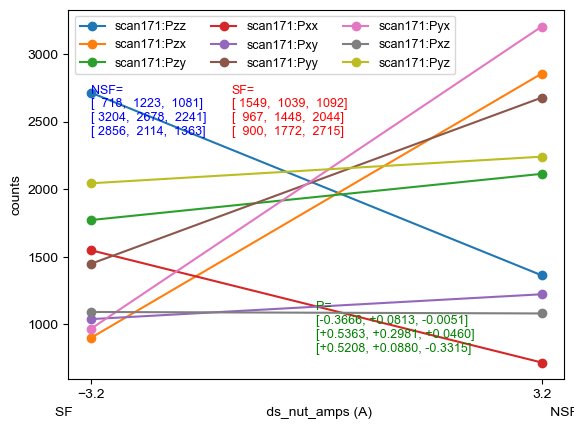

In [526]:
# Edit this part 
#-----------------------------------------------------------#
file_path='C:/Users/num/Documents/cycle506/exp943/Datafiles/'
file_number_list=[146,147,148,149,150,151,152,153,154]
title='(011)_-q_Ni2InSbO6-R_T2K_count60sec'
#---------------------------------------------------------#

#  code
import numpy as np
import matplotlib.pyplot as plt
d=np.loadtxt(file)
P = np.full((3,3), np.nan)
up = np.full((3,3), np.nan)
dn = np.full((3,3), np.nan)
up1 = np.full((3,3), np.nan)
dn1 = np.full((3,3), np.nan)
u =np.full(len(file_number_list), np.nan)
d =np.full(len(file_number_list), np.nan)
u1=np.full(len(file_number_list), np.nan)
u1=np.full(len(file_number_list), np.nan)

plabel=['Pzz','Pzx','Pzy','Pxx','Pxy','Pyy','Pyx','Pxz','Pyz']

i=0
for file_number in file_number_list:    
    try:
        file=file_path+'HB1_exp0943_scan'+str('%04d'%file_number)+'.dat'
        data=np.loadtxt(file)

        # plot SF and NSf counts from scans
        plt.plot(data[:,1],data[:,3],'o-', label='scan'+str(n)+':'+plabel[i])

        # normalized SF and NSf counts from scans
        u[i]=(data[:,3][0]/data[:,4][0])
        d[i]=(data[:,3][1]/data[:,4][1])

        #  SF and NSf counts from scans
        u1[i]=(data[:,3][0])
        d1[i]=(data[:,3][1])
        i=i+1
    except ValueError:
        pass

plt.xlabel('SF                                                  ds_nut_amps (A)                                              NSF')
plt.xticks([-3.2,3.2])
plt.ylabel('counts')
plt.legend(fontsize=9, ncol=3)

# Calculation of NSF, SF and P matrices
#--------------------------------------------------------------------------------
up=np.zeros([3,3])
dn=np.zeros([3,3])
up[2,2],up[2,0],up[2,1],up[0,0],up[0,1],up[1,1],up[1,0],up[0,2],up[1,2]=u[0],u[1],u[2],u[3],u[4],u[5],u[6],u[7],u[8]
dn[2,2],dn[2,0],dn[2,1],dn[0,0],dn[0,1],dn[1,1],dn[1,0],dn[0,2],dn[1,2]=d[0],d[1],d[2],d[3],d[4],d[5],d[6],d[7],d[8]

up1=np.zeros([3,3])
dn1=np.zeros([3,3])
up1[2,2],up1[2,0],up1[2,1],up1[0,0],up1[0,1],up1[1,1],up1[1,0],up1[0,2],up1[1,2]=\
u1[0],u1[1],u1[2],u1[3],u1[4],u1[5],u1[6],u1[7],u1[8]
dn1[2,2],dn1[2,0],dn1[2,1],dn1[0,0],dn1[0,1],dn1[1,1],dn1[1,0],dn1[0,2],dn1[1,2]=\
d1[0],d1[1],d1[2],d1[3],d1[4],d1[5],d1[6],d1[7],d1[8]
P=(up1-dn1)/(up1+dn1)


# printing NSF, SF and P matrices on plot
#------------------------------------------------------------------------------------
txt_up='NSF=\n'\
 '['+str('%5d'%up1[0,0])+', '+str('%5d'%up1[0,1])+', '+str('%5d'%up1[0,2])+']'+'\n'\
+'['+str('%5d'%up1[1,0])+', '+str('%5d'%up1[1,1])+', '+str('%5d'%up1[1,2])+']'+'\n'\
+'['+str('%5d'%up1[2,0])+', '+str('%5d'%up1[2,1])+', '+str('%5d'%up1[2,2])+']'
txt_dn='SF=\n'\
 '['+str('%5d'%dn1[0,0])+', '+str('%5d'%dn1[0,1])+', '+str('%5d'%dn1[0,2])+']'+'\n'\
+'['+str('%5d'%dn1[1,0])+', '+str('%5d'%dn1[1,1])+', '+str('%5d'%dn1[1,2])+']'+'\n'\
+'['+str('%5d'%dn1[2,0])+', '+str('%5d'%dn1[2,1])+', '+str('%5d'%dn1[2,2])+']'
txt_P='P=\n'\
 '['+str('%+5.4f'%P[0,0])+', '+str('%+5.4f'%P[0,1])+', '+str('%+5.4f'%P[0,2])+']'+'\n'\
+'['+str('%+5.4f'%P[1,0])+', '+str('%+5.4f'%P[1,1])+', '+str('%+5.4f'%P[1,2])+']'+'\n'\
+'['+str('%+5.4f'%P[2,0])+', '+str('%+5.4f'%P[2,1])+', '+str('%+5.4f'%P[2,2])+']'

plt.text(-3.2, 0.75*np.max(u1), txt_up, fontsize=9, color='blue')
plt.text(-1.2, 0.75*np.max(u1), txt_dn, fontsize=9, color='red')
plt.text(0,    0.25*np.max(u1), txt_P,  fontsize=9, color='green')

plt.show()

In [654]:
np.linspace(267,275,9)

array([267., 268., 269., 270., 271., 272., 273., 274., 275.])

In [655]:
np.linspace(276,284,9)

array([276., 277., 278., 279., 280., 281., 282., 283., 284.])

In [ ]:
276., 277., 278., 286., 280., 281., 282., 283., 284.

In [656]:
np.linspace(289,297,9)

array([289., 290., 291., 292., 293., 294., 295., 296., 297.])